## Introduction

In this project, I explore a dataset of over 100,000 Spotify tracks to uncover patterns in song characteristics, genre trends, and audio-driven popularity. The dataset includes a range of features provided by Spotify's API, such as energy, danceability, loudness, valence, and explicitness, as well as metadata like genre and popularity scores.

The goal of this analysis is to answer key questions such as:
- What makes a song popular?
- How do different audio features relate to one another?
- Are explicit songs generally more successful?
- Do certain genres have longer or more energetic tracks?

Using data cleaning, aggregation, and visualization techniques, I aim to extract meaningful insights from the dataset while balancing statistical interpretation with musical intuition. Each section focuses on a specific trend, supported by visualizations and brief commentary.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Importing Dataset

In [2]:
df = pd.read_csv("./dataset.csv")
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Data Exploration and Cleaning

Before beginning analysis, I performed an initial exploration of the dataset to understand the structure and purpose of each attribute. The dataset contains over 100,000 Spotify tracks with features such as danceability, energy, loudness, valence, and popularity, among others.

### Steps Taken:

1. **Reviewed the dataset schema**
   - Identified the type of each column (e.g., numerical, categorical, boolean)
   - Checked for null values or duplicates
   - Interpreted the meaning of audio features using Spotify’s documentation

2. **Dropped unnecessary or redundant attributes**
   - `Unnamed: 0`: Index column created during CSV export, not useful
   - `track_id`: Unique identifier not required for analysis
   - `liveness`: Not reliable for measuring live vs studio recordings

3. **Created new features for clarity**
   - Converted `duration_ms` to `duration_s` for readability
   - Extracted top genres using groupby and sorted them for focused comparisons

4. **Filtered duplicates**
   - Removed exact duplicate rows where all attributes matched except for genre — to avoid bias in genre-based analysis

5. **Verified cleaned dataset**
   - Ensured all remaining columns had consistent types and no missing values
   - Sampled a few entries to confirm correct formatting and values

### Initial Dataset Overview

I started by inspecting the structure of the dataset using `df.info()` to understand the number of entries, data types, and missing values for each column.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Attributes Removed During Cleaning
1. **Unnamed: 0**  
   - An indexing column automatically generated during CSV export; not meaningful for analysis.
2. **liveness**  
   - Intended to detect whether a track is performed live, but not reliably measurable from audio data alone.
3. **track_id**  
   - A unique identifier used internally by Spotify. Since track names and artist/album metadata are available, this column was not necessary for grouping or analysis.


In [4]:
df = df.drop(columns=['Unnamed: 0', 'liveness','track_id'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

### Statistical Summary of Numerical Features

To get a general sense of the dataset’s scale and distributions, I used `df.describe()` to summarize the central tendency, spread, and range of all numeric attributes. This helped identify outliers and understand the typical values for features such as popularity, danceability, energy, and duration.


In [5]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,0.995000,243.372000,5.000000


### Unique Value Count Per Column

To understand the diversity of values within each column, I used `df.nunique()` to count the number of unique entries per feature. This is especially useful for identifying:
- Categorical columns (like `track_genre`)
- Columns with limited variation (like `explicit`, `mode`)
- Potential identifiers (like `track_name`, `artists`)


In [6]:
df.nunique()

artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

### Missing Values Check

To ensure data completeness, I used `df.isnull().sum()` to identify missing values in each column. This step is critical before performing any analysis or visualizations, as null values can lead to errors or skewed results. In this dataset, only a few columns had missing values, primarily due to minor inconsistencies in metadata like `track_name` or `artists`.


In [7]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Handling Missing Data

After identifying a small number of missing values, I chose to remove those rows using `df.dropna()`. This approach is reasonable given the dataset’s large size (over 100,000 rows), where removing a small fraction will not significantly affect the analysis. A follow-up check confirmed that no missing values remain.


In [8]:
df = df.dropna()
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Removing Duplicate Records

To prevent bias in the analysis, I checked for and removed duplicate rows using `df.duplicated()`. These duplicates often occur when the same track is listed multiple times with identical attributes (except possibly for genre). After filtering them out, I created a cleaned version of the dataset (`df_cleaned`) for use in all future steps.


In [9]:
duplicates = df[df.duplicated()]
df_cleaned = df.drop_duplicates().copy()

### Verifying Duplicate Removal

To confirm that all duplicates had been removed from the cleaned dataset, I checked `df_cleaned` again using `df_cleaned.duplicated()`. The result shows an empty


In [10]:
df_cleaned_duplicate = df_cleaned[df_cleaned.duplicated()]
df_cleaned_duplicate

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre


### Converting Duration from Milliseconds to Seconds

To improve readability and make time-based analysis more intuitive, I converted the `duration_ms` column (milliseconds) to `duration_s` (seconds). The values were rounded to one decimal place for consistency. After conversion, the original `duration_ms` column was dropped to reduce redundancy.


In [11]:
df_cleaned['duration_s'] = df_cleaned['duration_ms'].apply(lambda x: round(x/1000,1))
df_cleaned.drop(columns='duration_ms', inplace=True)
df_cleaned

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre,duration_s
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.7150,87.917,4,acoustic,230.7
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.2670,77.489,4,acoustic,149.6
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1200,76.332,4,acoustic,210.8
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1430,181.740,3,acoustic,201.9
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.1670,119.949,4,acoustic,198.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0339,125.995,5,world-music,385.0
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.0350,85.239,4,world-music,385.0
113997,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.7430,132.378,4,world-music,271.5
113998,Michael W. Smith,Change Your World,Friends,41,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.4130,135.960,4,world-music,283.9


### Top 10 Most Popular Songs

To explore individual tracks with the highest popularity scores, I sorted the dataset in descending order by the `popularity` column and selected the top 10 entries. This gives a snapshot of the songs that are most favored by Spotify users, based on Spotify’s internal popularity metric (0–100).


In [12]:
top_10_popular_song = df_cleaned.sort_values('popularity', ascending=False).head(10)
top_10_popular_song

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre,duration_s
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.238,131.121,4,dance,156.9
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.238,131.121,4,pop,156.9
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.550,128.033,4,hip-hop,198.9
81210,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.304,128.040,4,pop,175.2
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.304,128.040,4,dance,175.2
89411,Manuel Turizo,La Bachata,La Bachata,98,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,reggaeton,162.6
30003,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.304,128.040,4,edm,175.2
68303,Manuel Turizo,La Bachata,La Bachata,98,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,latino,162.6
67356,Manuel Turizo,La Bachata,La Bachata,98,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,latin,162.6
88410,Manuel Turizo,La Bachata,La Bachata,98,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.850,124.980,4,reggae,162.6


### Top 10 Least Popular Songs

To contrast with the most popular tracks, I also retrieved the 10 songs with the lowest popularity scores by sorting the dataset in ascending order. These tracks typically have a popularity score of zero, which may reflect limited streaming activity, niche appeal, or recently added content that hasn't yet gained traction.


In [13]:
top_10_least_popular_song = df_cleaned.sort_values('popularity').head(10)
top_10_least_popular_song

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,track_genre,duration_s
24,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,False,0.796,0.6670,5,-4.831,0,0.0392,0.381000,0.000000,0.7540,97.988,4,acoustic,231.3
75032,Jim Brickman,Winter Chill,I'll Be Home For Christmas,0,False,0.248,0.0657,0,-18.973,1,0.0318,0.968000,0.877000,0.0793,91.470,4,new-age,225.1
75031,Jim Brickman,Winter Chill,O Come O Come Emmanuel,0,False,0.419,0.0724,7,-17.252,1,0.0360,0.980000,0.791000,0.2270,132.459,5,new-age,177.6
75049,George Winston,Best Christmas Playlist Ever 2022,Linus And Lucy,0,False,0.289,0.5990,8,-12.626,1,0.0392,0.893000,0.814000,0.8040,165.914,4,new-age,195.9
75048,George Winston,The Very Best Christmas Songs 2022,Linus And Lucy,0,False,0.289,0.5990,8,-12.626,1,0.0392,0.893000,0.814000,0.8040,165.914,4,new-age,195.9
75046,Mike Oldfield,Anthems for Witches 2022,"Tubular Bells - Opening Theme / From ""The Exor...",0,False,0.325,0.2660,4,-16.968,0,0.0298,0.803000,0.000093,0.3850,147.198,3,new-age,196.7
75091,David Arkenstone,Winter Chill,O Holy Night,0,False,0.323,0.1640,5,-16.185,1,0.0348,0.982000,0.927000,0.2450,74.747,3,new-age,251.3
75090,ICE-T,The Hip Hop Collection,New Jack Hustler (Nino's Theme),0,True,0.830,0.8590,7,-9.213,1,0.1240,0.000956,0.000000,0.6530,109.319,4,new-age,283.3
75086,ICE-T,Rap Classics,6 'n the Mornin',0,True,0.823,0.7450,5,-6.637,0,0.2470,0.002900,0.000333,0.5790,91.919,4,new-age,224.9
75085,Nicholas Gunn;Diana Miro,Armada Music - ADE 2022,Hold Me Tight,0,False,0.648,0.5790,9,-9.346,1,0.0299,0.458000,0.283000,0.0400,119.981,4,new-age,196.6


## Correlation Between Audio Features

This section explores how Spotify's audio features (e.g., danceability, energy, valence) relate to one another. I created multiple scatterplots to visualize pairwise relationships, and a correlation heatmap to summarize linear correlations across all features.

The regression plot between **energy** and **loudness** shows a clear positive linear relationship. Most songs with high energy are also loud, and the data points cluster tightly in the high-energy range. This suggests a strong association between these two features.

However, since the plot is based on a **random sample of 1,000 tracks**, the observed tightness may partially reflect sampling variation. A broader or repeated sample could help confirm the consistency of this trend.

From a real-world perspective, the relationship makes sense — producing louder sounds often requires greater physical or electronic energy, especially in genres that emphasize intensity.


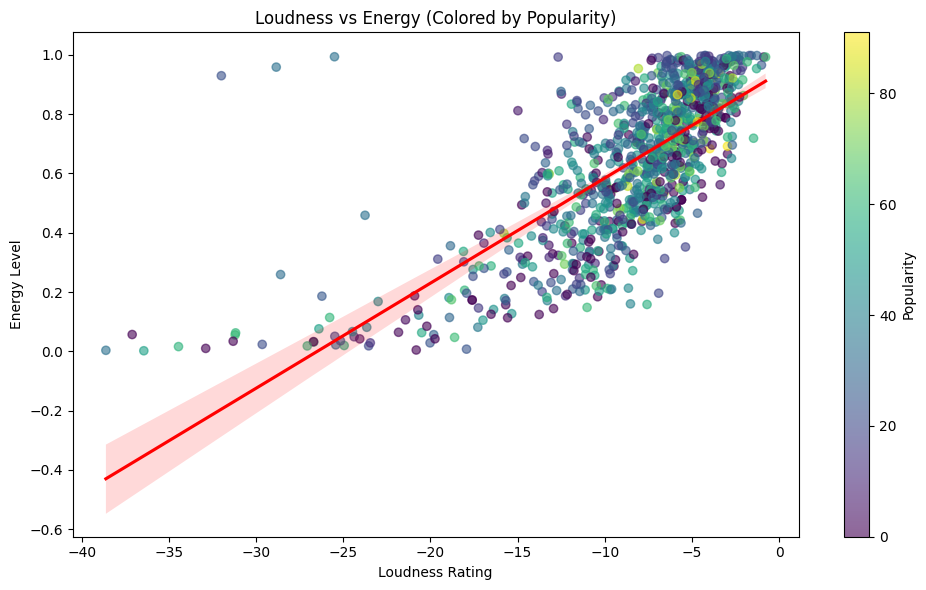

In [14]:
loudness_energy_df = df_cleaned[['loudness', 'energy', 'popularity']].sample(1000)
# fig, ax = plt.subplots(2,1)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=loudness_energy_df['loudness'],
    y=loudness_energy_df['energy'],
    c=loudness_energy_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=loudness_energy_df,
    x='loudness',
    y='energy',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Loudness Rating')
plt.ylabel('Energy Level')
plt.title('Loudness vs Energy (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

The regression plot between **acousticness** and **energy** shows a general negative trend — songs with high energy tend to have lower acousticness. This aligns with intuition: genres like EDM, hip-hop, or rock often rely on synthetic or amplified sounds, making them less acoustic by design.

However, the relationship is far less clean than what we saw with loudness and energy. The spread is wide, especially in the mid-to-high acousticness range, where energy levels vary substantially. While low-acoustic, high-energy songs are common, the inverse (high-acoustic, low-energy) is not as tightly grouped, making the trend feel weaker and less consistent.

There are also several outliers and a large distribution of mid-energy tracks with varying acousticness, which may reflect genre blending or more nuanced instrumentation. The noise in this plot suggests that while the general rule holds, **acousticness alone isn't a strong predictor of energy**.


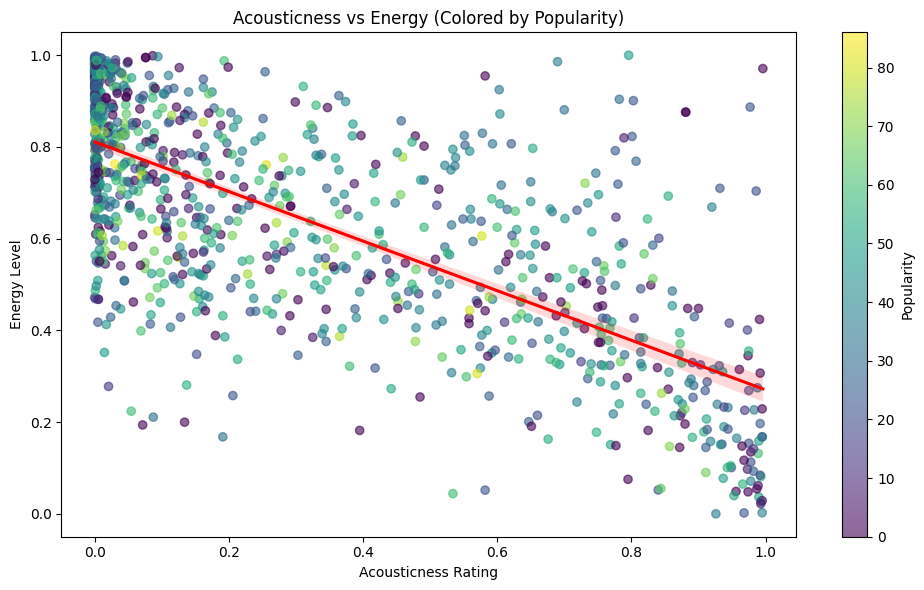

In [15]:
acousticness_energy_df = df_cleaned[['acousticness', 'energy', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=acousticness_energy_df['acousticness'],
    y=acousticness_energy_df['energy'],
    c=acousticness_energy_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=acousticness_energy_df,
    x='acousticness',
    y='energy',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Acousticness Rating')
plt.ylabel('Energy Level')
plt.title('Acousticness vs Energy (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

The regression plot between **danceability** and **valence** displays a positive slope, suggesting a potential relationship between how danceable and how emotionally positive a song is. However, the data points are widely scattered across the plot, with no clear clustering or pattern.

This high variability indicates that the correlation is **very weak or possibly misleading**, even though the regression line trends upward. In practice, this means that while some upbeat, danceable songs may also have a higher valence (happier tone), many do not — and vice versa.

The weak association may reflect the fact that danceability can exist in both happy (e.g., pop) and sad genres, and valence can be genre-independent.


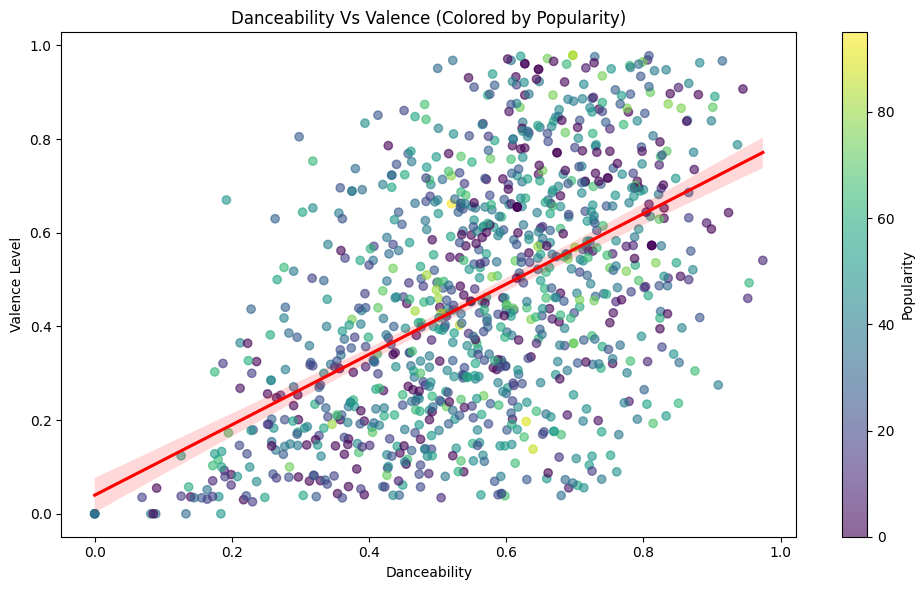

In [16]:
danceability_valence_df = df_cleaned[['danceability', 'valence', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=danceability_valence_df['danceability'],
    y=danceability_valence_df['valence'],
    c=danceability_valence_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=danceability_valence_df,
    x='danceability',
    y='valence',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Danceability')
plt.ylabel('Valence Level')
plt.title('Danceability Vs Valence (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

The regression line between **instrumentalness** and **speechiness** is nearly flat, suggesting **no clear linear relationship** between the two features. The data points are widely scattered, and both high and low values of speechiness occur across a broad range of instrumentalness values — particularly near zero.

This pattern is expected, since songs with **high instrumentalness** are, by definition, unlikely to contain vocals (thus speechiness would be low), but a large portion of tracks in the dataset exhibit **low instrumentalness and varying levels of speechiness**, making the relationship difficult to interpret.

The overall spread appears random, and the lack of any tight clustering or directional slope supports the conclusion that **these two features are largely independent** in this dataset.


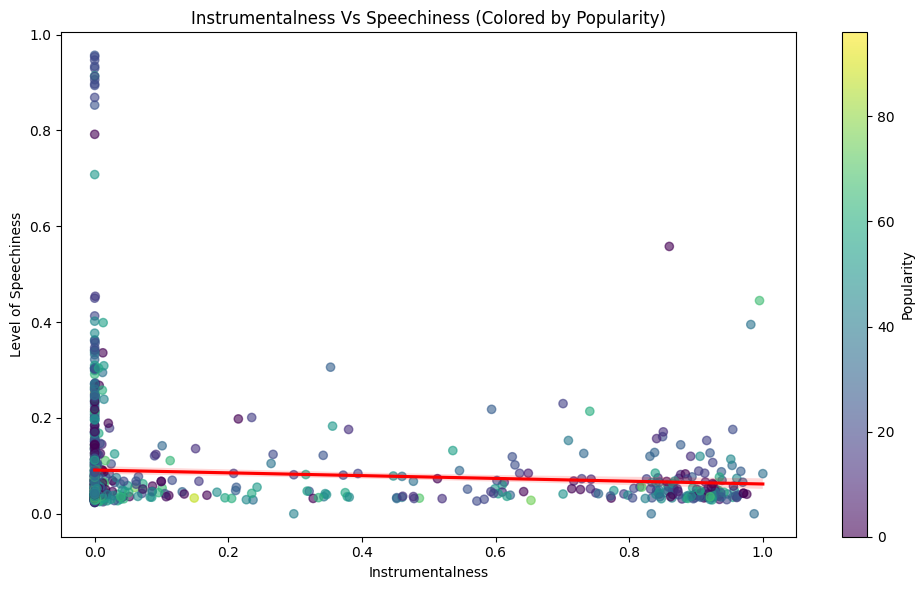

In [17]:
instrumentalness_speechiness = df_cleaned[['instrumentalness', 'speechiness', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=instrumentalness_speechiness['instrumentalness'],
    y=instrumentalness_speechiness['speechiness'],
    c=instrumentalness_speechiness['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=instrumentalness_speechiness,
    x='instrumentalness',
    y='speechiness',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Instrumentalness')
plt.ylabel('Level of Speechiness')
plt.title('Instrumentalness Vs Speechiness (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

Despite an initial assumption that **higher tempo** would naturally lead to **greater danceability**, the regression plot shows **no clear trend** between the two features. The line is nearly flat, and data points are scattered throughout the range, showing little to no consistent relationship.

This finding is somewhat surprising — intuitively, faster songs (e.g., in dance or electronic genres) are often perceived as more danceable. However, the lack of correlation may reflect the **multifaceted nature of danceability**, which is influenced by rhythm, groove, beat clarity, and more — not just tempo alone.

It's also possible that this result was influenced by the randomness of the sample used in the plot, or by genre diversity where slow songs can still be highly danceable (e.g., reggaeton or funk).


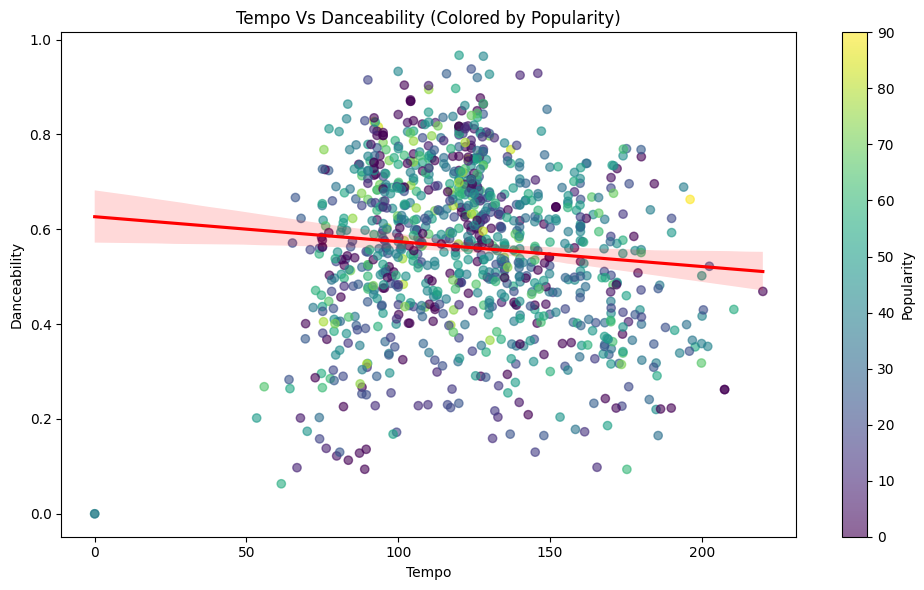

In [18]:
tempo_danceability_df = df_cleaned[['tempo', 'danceability', 'popularity']].sample(1000)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=tempo_danceability_df['tempo'],
    y=tempo_danceability_df['danceability'],
    c=tempo_danceability_df['popularity'], # Additional Information
    cmap='viridis',
    alpha=0.6
    )
# Add regression line separately
sns.regplot(
    data=tempo_danceability_df,
    x='tempo',
    y='danceability',
    scatter=False,
    line_kws={'color': 'red'},
)
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.title('Tempo Vs Danceability (Colored by Popularity)')
plt.colorbar(scatter, label='Popularity')
plt.tight_layout()
plt.show()

### Correlation Heatmap: Audio Feature Relationships

To validate the relationships observed in the scatter and regression plots, I generated a correlation heatmap for all numerical audio features. This matrix provides a compact overview of how strongly features are linearly related to each other, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

The heatmap largely confirms earlier observations:
- **Loudness and energy** show a strong positive correlation
- **Acousticness and energy** have a clear negative relationship
- Features like **tempo and danceability**, or **instrumentalness and speechiness**, show very weak or no correlation, matching the scattered patterns seen in regression plots

This summary helps reinforce the insight that while some features are intuitively and statistically related, others behave more independently in this dataset.


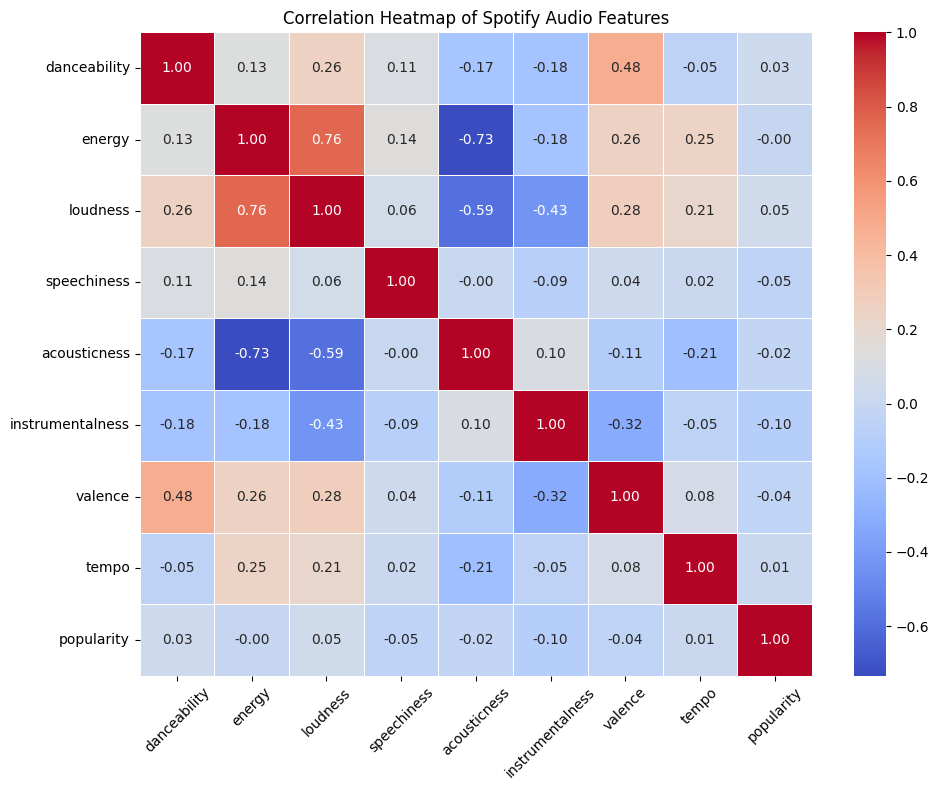

In [19]:
# Select only numerical audio features
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'valence', 'tempo', 'popularity'
]
# Compute correlation matrix
corr_matrix = df_cleaned[audio_features].corr()
# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Spotify Audio Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Genre Influence on Popularity and Song Duration

To understand how genre shapes listener preferences and song structure, I analyzed both the median **popularity** and **duration** of songs across the top 10 most popular genres.

Using `groupby` and `median` aggregations, I ranked genres by their typical popularity and then examined how long songs in each of these genres tend to be. The results were visualized using two aligned bar charts.


In [20]:
df_genre_duration = df_cleaned.groupby('track_genre')[['duration_s', 'popularity']].median().copy()
df_genre_duration = df_genre_duration.sort_values('popularity', ascending=False).head(10)
df_genre_duration.reset_index(inplace=True)
df_genre_duration = df_genre_duration.sort_values('duration_s', ascending=False)
df_genre_duration


,track_genre,duration_s,popularity
2,pop-film,279.90,60.0
5,metal,238.90,57.0
6,grunge,229.85,55.0
1,k-pop,229.80,60.0
0,pop,211.50,66.0
8,british,210.50,52.0
3,hip-hop,199.20,58.0
9,progressive-house,195.20,52.0
4,chill,166.00,57.0
7,sad,149.50,54.0


### Top 10 Most Popular Genres (Median Popularity)

To identify which music genres are generally more favored by listeners, I grouped the dataset by `track_genre` and calculated the **median popularity** for each. Median was chosen over mean to reduce the impact of outliers.

After sorting the results in descending order, I selected the top 10 genres with the highest median popularity. This helps highlight genres that consistently perform well across


In [21]:
top_10_genre = df_cleaned.groupby('track_genre')['popularity'].median()
top_10_genre = top_10_genre.sort_values(ascending=False).head(10)
top_10_genre

track_genre
pop                  66.0
k-pop                60.0
pop-film             60.0
hip-hop              58.0
chill                57.0
metal                57.0
grunge               55.0
sad                  54.0
british              52.0
progressive-house    52.0
Name: popularity, dtype: float64

In [22]:
df_cleaned.groupby('track_genre').size().sort_values()

track_genre
romance        904
classical      933
german         961
dance          962
honky-tonk     981
              ... 
spanish       1000
sertanejo     1000
samba         1000
tango         1000
techno        1000
Length: 114, dtype: int64

### Median Popularity

Among the top 10 genres, it’s not surprising that **pop** ranks highest in median popularity. Other pop-adjacent genres such as **k-pop** and **pop-film** also perform strongly, which aligns with the expectation that pop music is designed for broad appeal. Its accessibility and heavy promotion contribute to its widespread popularity.

On the other hand, more niche genres like **grunge** and **progressive-house** appear lower on the popularity scale. These genres may have dedicated fanbases, but they don’t reach the same mainstream audience. Importantly, this ranking is not heavily influenced by outliers — the dataset limits each genre to roughly 1,000 songs, with no major imbalance in sample size.

---

### Median Duration

In terms of duration, **pop-film** tracks have the highest median at around 280 seconds. This is expected, as songs tied to film projects are often more cinematic or artistic in nature, potentially leading to longer runtimes.

Genres like **chill** and **sad** tend to have shorter durations, which fits their relaxed mood — often prioritizing vibes over complexity. Interestingly, there doesn’t appear to be a direct relationship between popularity and track length: for example, **grunge** has lower popularity but a longer median duration than several higher-ranking genres.

This suggests that **track length alone is not a key driver of popularity**. Instead, genre conventions and listener expectations likely play a more significant role.


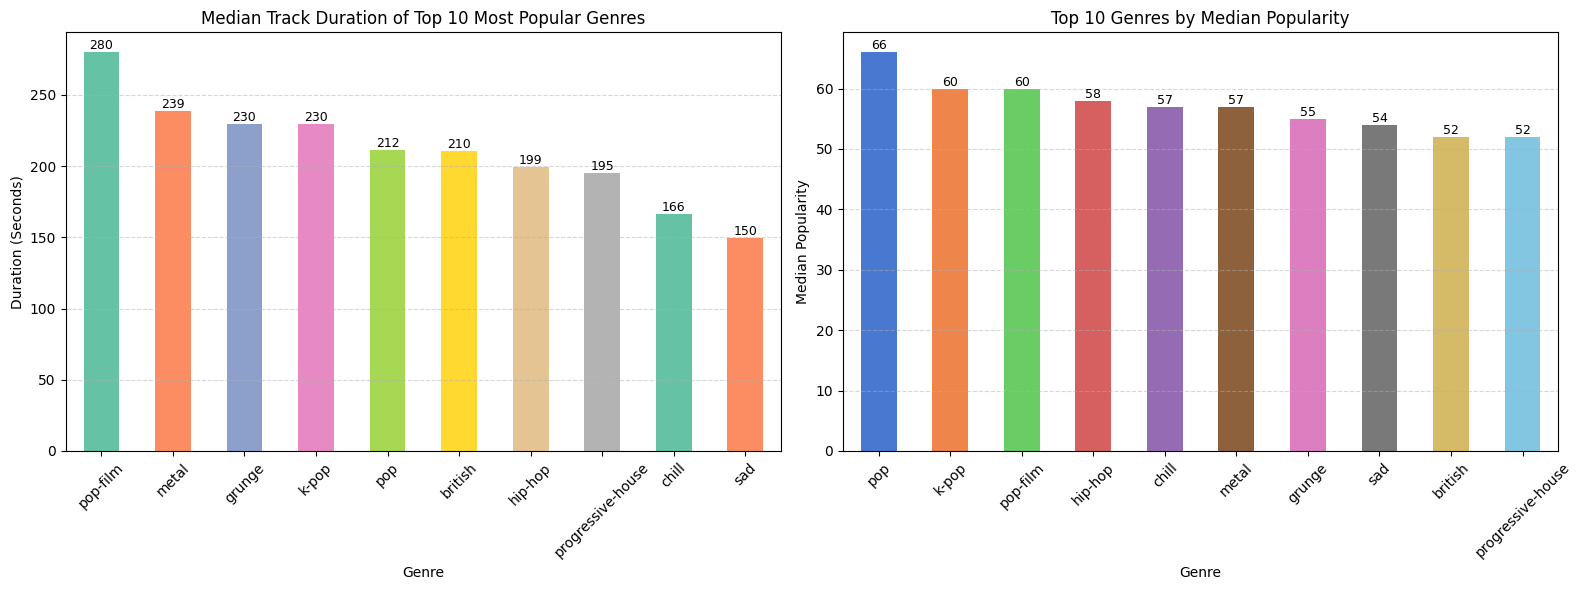

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
colors = sns.color_palette("Set2", n_colors=len(df_genre_duration))
df_genre_duration.plot(
    kind='bar',
    x='track_genre',
    y='duration_s',
    color=colors,
    ax=ax[0],
    legend=False
)
ax[0].set_title('Median Track Duration of Top 10 Most Popular Genres')
ax[0].set_ylabel('Duration (Seconds)')
ax[0].set_xlabel('Genre')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.0f}',
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=9)
top_10_genre.plot(
    kind='bar',
    ax=ax[1],
    color=sns.color_palette("muted", n_colors=10)
)
ax[1].set_title('Top 10 Genres by Median Popularity')
ax[1].set_ylabel('Median Popularity')
ax[1].set_xlabel('Genre')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.0f}',
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


## Popularity and Feature Differences Based on Explicitness

To investigate whether explicit content affects popularity, I created a boxplot comparing the popularity of explicit vs non-explicit songs. I extended this analysis by comparing multiple audio features (e.g., energy, loudness, valence) using boxplots, grouped by explicitness.


In [24]:
attribute_list = ['energy', 'loudness', 'speechiness', 'valence', 'danceability']

In [25]:
df_explicit = df.groupby('explicit')
df_explicit.size()

explicit
False    104252
True       9747
dtype: int64

### Overall Popularity

Explicit songs appear to be more popular than non-explicit songs across most categories. However, this result should be interpreted with caution — the dataset contains significantly more non-explicit songs, and analyzing the full population may introduce imbalance. If a smaller, random sample of non-explicit songs were used, the popularity gap might narrow or even reverse. In short, the higher popularity of explicit songs may partially reflect sampling and genre distribution rather than content alone.

---

### Energy Bin

I initially expected that songs which are both explicit and high in energy would be more popular, given that energy and explicitness often relate to intense genres like hip-hop or rock. However, the data shows that **popularity tends to decrease** as energy increases, for both explicit and non-explicit tracks. This trend contradicts my intuition and suggests that extremely energetic songs may not be as commercially successful as more balanced ones.

---

### Loudness Bin

In contrast, loudness appears to align more closely with my expectations. Songs with higher loudness levels tend to have higher popularity, especially among explicit tracks. The increase isn't dramatic, but it is consistent. This supports the idea that louder, more intense songs (common in modern pop, EDM, or rap) may have a slight edge in attracting listeners.

---

### Speechiness Bin

Surprisingly, songs with **lower speechiness** are generally more popular, even among explicit tracks. This goes against the assumption that speech-heavy music — like rap or hip-hop — would dominate in both popularity and explicit content. One possible explanation is that extremely high speechiness (e.g., skits or or experimental tracks) may not perform as well commercially, despite being common in explicit genres.

---

### Valence Bin

Across valence levels, popularity is fairly consistent, with explicit songs showing only a slight edge in each bin. This supports the idea that **valence is not a major factor** in determining whether a song is explicit or popular. Both low-valence (sad) and high-valence (happy) songs may contain explicit language, depending on genre or lyrical style.

---

### Danceability Bin

The danceability bins show the **widest spread in popularity**, especially for high-danceability tracks. This may reflect variability in the artists themselves — for example, well-known DJs with highly danceable tracks can dramatically skew the popularity upward, while lesser-known producers in the same range may pull the average down. The inconsistency makes it harder to draw a definitive trend, but it does highlight the role of artist recognition in driving popularity within dance-focused genres.

---

### Summary

The analysis shows that while explicit songs tend to have higher median popularity, this trend is shaped by **genre patterns** and the **distribution of audio features**. Certain assumptions — such as energy or speechiness correlating with popularity — do not always hold. In fact, the data reveals that **popularity is multi-dimensional**, shaped by more than just explicit content or raw feature values. Further analysis by genre, artist, or listener engagement would provide even deeper insights.


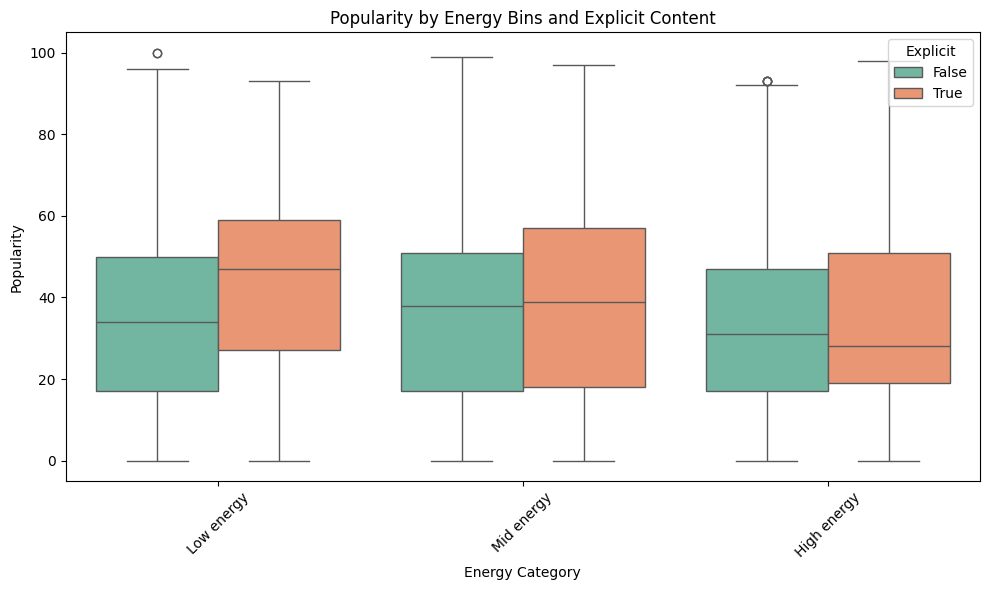

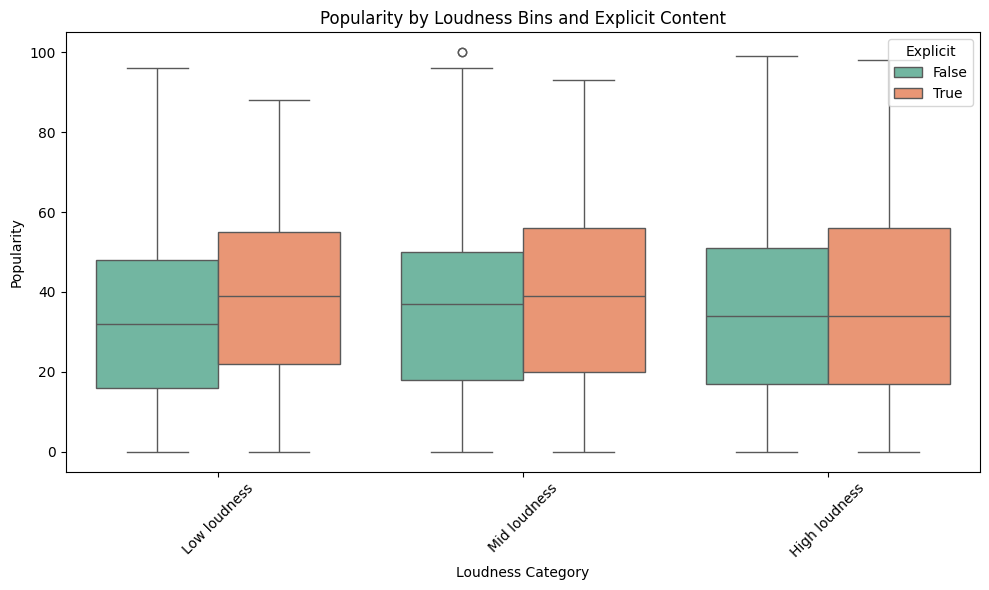

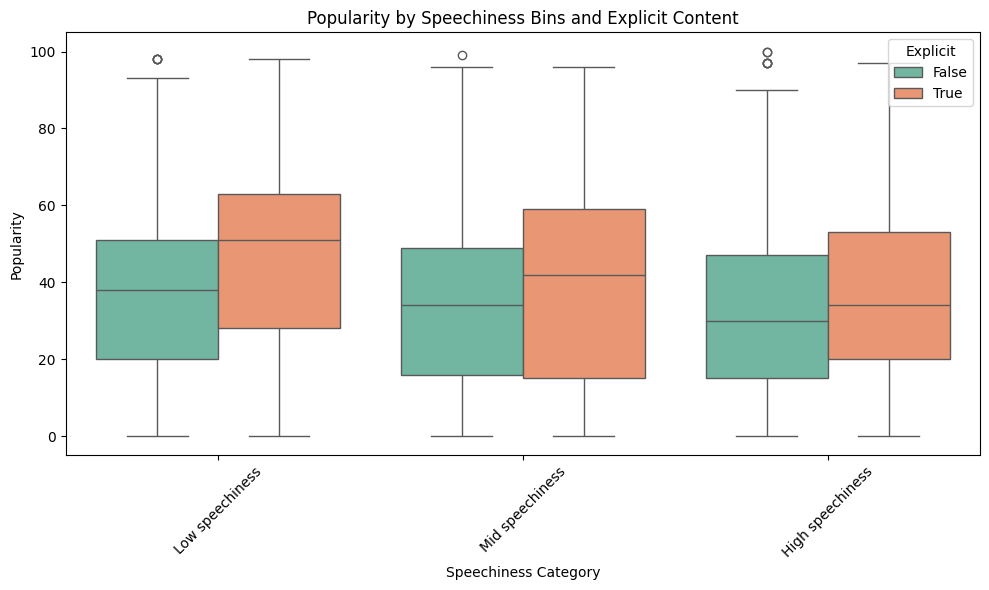

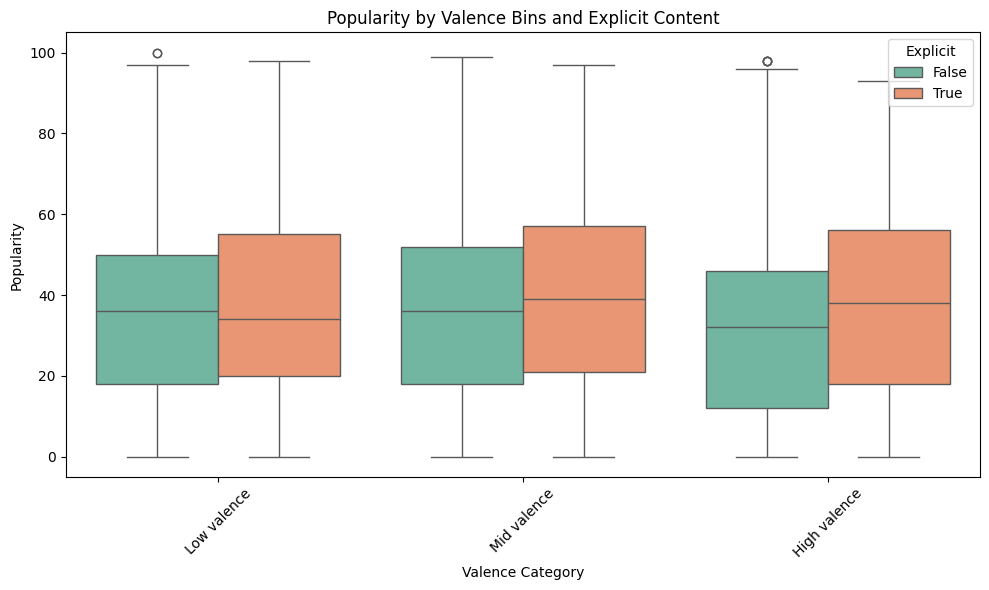

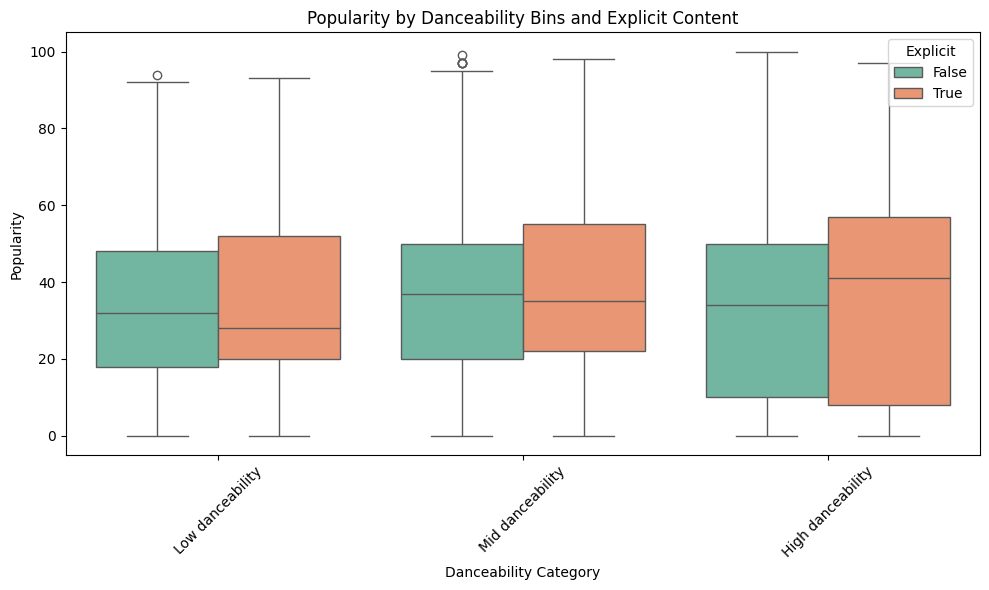

In [26]:
num_bins = 3  # Bins divide the attribute into buckets
for feature in attribute_list:
    df_cleaned['feature_bin'] = pd.qcut(df_cleaned[feature], q=num_bins, labels=[f'Low {feature}', f'Mid {feature}', f'High {feature}']) # Help divide the bins
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_cleaned, x='feature_bin', y='popularity', hue='explicit', palette='Set2')
    plt.title(f'Popularity by {feature.capitalize()} Bins and Explicit Content')
    plt.xlabel(f'{feature.capitalize()} Category')
    plt.ylabel('Popularity')
    plt.legend(title='Explicit')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
df_cleaned.drop(columns='feature_bin', inplace=True)
